In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from subprocess import call

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

Program parameters:

In [2]:
machine    = "spa"
kernel1    = "cpu"
size1      = "small"
kernel2    = "cpu"
size2      = "large"
randomised = False

exp_no = 

if (exp_no == 1):
    nc1 = 24
    nc2 = 24
    kernel1    = "cpu"
    size1      = "large"
    kernel2    = "vm"
    size2      = "large"
elif (exp_no == 2):
    nc1 = 24
    nc2 = 20
    kernel1    = "cpu"
    size1      = "small"
    kernel2    = "cpu"
    size2      = "large"
elif (exp_no == 3):
    nc1 = 24
    nc2 = 4
    kernel1    = "cpu"
    size1      = "small"
    kernel2    = "vm"
    size2      = "small"
elif (exp_no == 4):
    nc1 = 24
    nc2 = 24
    kernel1    = "vm"
    size1      = "small"
    kernel2    = "cpu"
    size2      = "large"
elif (exp_no == 5):
    nc1 = 16
    nc2 = 24
    kernel1    = "vm"
    size1      = "small"
    kernel2    = "vm"
    size2      = "large"

In [3]:
if machine == "spa":
    number_of_tests = 1296
    num_workers_max = 24
    num_cores_max   = 24
    greater_than_threshold = 12

elif machine == "XXXII":
    number_of_tests = 576
    num_workers_max = 48
    num_cores_max   = 48
    greater_than_threshold = 32

folder_path1   = "results/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + "_1/"
folder_path2   = "results/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + "_2/"
graph_path     = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + ".png"
# graph_folder   = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + "/"
# graph_aminated = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + ".gif"
# text_path      = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + ".txt"

# if not os.path.exists(graph_folder):
#     os.makedirs(graph_folder)

In [4]:
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")

In [5]:
data1 = []
data2 = []
        
fetch_data(folder_path1, file_names, data1, ["Runtime"])
fetch_data(folder_path2, file_names, data2, ["Runtime"])
        
dataset = []
raw_dataset = []

num_workers_min = 4
num_workers_step = 4
num_workers_values = range(num_workers_min, num_workers_max + num_workers_step, num_workers_step)
nwv_len = len(num_workers_values)
num_workers = num_workers_values[0]

num_cores_min = 4
num_cores_step = 4
num_cores_values = range(num_cores_min, num_cores_max + num_cores_step, num_cores_step)
ncv_len = len(num_cores_values)
num_cores = num_cores_values[0]

for i in range(len(data1)):
    num_workers1 = num_workers_values[i % nwv_len]
    num_cores1 = num_cores_values[(i // nwv_len) % ncv_len]
    num_workers2 = num_workers_values[((i // nwv_len) // ncv_len) % nwv_len]
    num_cores2 = num_cores_values[(((i // nwv_len) // ncv_len) // nwv_len) % ncv_len]
    
    dataset.append([int(num_cores1), int(num_workers1), int(num_cores2), int(num_workers2), np.mean([x + y for x, y in zip(data1[i].values, data2[i].values)])])

    for j in range(1, len(data1[i])):
        raw_dataset.append([num_cores1, num_workers1, num_cores2, num_workers2, data1[i].values[j][0] + data2[i].values[j][0]])
    
dataset = pd.DataFrame(dataset)
dataset.columns = ["Num Cores 1", "Num Workers 1", "Num Cores 2", "Num Workers 2", "Total Runtime"]

raw_dataset = pd.DataFrame(raw_dataset)
raw_dataset.columns = ["Num Cores 1", "Num Workers 1", "Num Cores 2", "Num Workers 2", "Total Runtime"]

if (len(dataset) != 1296):
    print("ERROR! INCORRECT LENGTH OF DATASET!")
    print("VALUE FOUND: ", len(dataset))
#     quit()

In [6]:
reduced_dataset = dataset[(dataset["Num Cores 1"] == nc1) & (dataset["Num Cores 2"] == nc2)]

reduced_raw_dataset = raw_dataset[(raw_dataset["Num Cores 1"] == nc1) & (raw_dataset["Num Cores 2"] == nc2)]

min_runtime = min(reduced_dataset["Total Runtime"])

nw1 = reduced_dataset[reduced_dataset["Total Runtime"] == min(reduced_dataset["Total Runtime"])]["Num Workers 1"].item()

nw2 = reduced_dataset[reduced_dataset["Total Runtime"] == min(reduced_dataset["Total Runtime"])]["Num Workers 2"].item()

reduced_dataset[reduced_dataset["Total Runtime"] == min(reduced_dataset["Total Runtime"])]

,Num Cores 1,Num Workers 1,Num Cores 2,Num Workers 2,Total Runtime
33,24,16,4,4,190.970297


In [7]:
if machine == "spa":
    number_of_tests = 144
    num_workers_max = 24
    num_cores_max   = 24
    greater_than_threshold = 12

elif machine == "XXXII":
    number_of_tests = 576
    num_workers_max = 48
    num_cores_max   = 48
    greater_than_threshold = 32
    

    
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")
    
data1 = []
data2 = []
        
fetch_data("../optimal_threads/results/" + machine + "/optimal_threads_" + kernel1 + "_" + size1 + "/", file_names, data1, ["Runtime"])
fetch_data("../optimal_threads/results/" + machine + "/optimal_threads_" + kernel2 + "_" + size2 + "/", file_names, data2, ["Runtime"])



dataset1 = []
dataset2 = []

raw_dataset1 = []
raw_dataset2 = []

idata = []

num_workers_min = 2
num_workers_step = 2
num_workers_values = range(num_workers_min, num_workers_max + num_workers_step, num_workers_step)
nwv_len = len(num_workers_values)
num_workers = num_workers_values[0]

num_cores_min = 2
num_cores_step = 2
num_cores_values = range(num_cores_min, num_cores_max + num_cores_step, num_cores_step)
ncv_len = len(num_cores_values)
num_cores = num_cores_values[0]

for i in range(len(data1)):
    num_workers = num_workers_values[i % nwv_len]
    num_cores = num_cores_values[(i // nwv_len) % ncv_len]
    
    if (num_cores % 4 == 0) & (num_workers % 4 == 0):
        dataset1.append([num_cores, num_workers, data1[i][1:].mean()[0]])
        
    for j in range(1, len(data1[i])):
        raw_dataset1.append([num_cores, num_workers, data1[i].values[j][0]])
        
for i in range(len(data2)):
    num_workers = num_workers_values[i % nwv_len]
    num_cores = num_cores_values[(i // nwv_len) % ncv_len]
    
    if (num_cores % 4 == 0) & (num_workers % 4 == 0):
        dataset2.append([num_cores, num_workers, data2[i][1:].mean()[0]])
        
    for j in range(1, len(data2[i])):
        raw_dataset2.append([num_cores, num_workers, data2[i].values[j][0]])
        
        
for i in range(len(data1)):
    for j in range(len(data2)):
        num_workers1 = num_workers_values[i % nwv_len]
        num_cores1 = num_cores_values[(i // nwv_len) % ncv_len]
        num_workers2 = num_workers_values[j % nwv_len]
        num_cores2 = num_cores_values[(j // nwv_len) % ncv_len]

        if (num_cores1 % 4 == 0) & (num_workers1 % 4 == 0) & (num_cores2 % 4 == 0) & (num_workers2 % 4 == 0):
            for k in range(1, len(data1[i])):
                idata.append([num_cores1, num_workers1, num_cores2, num_workers2, data1[i].values[k][0] + data2[j].values[k][0]])

dataset1 = pd.DataFrame(dataset1)
dataset1.columns = ["Num Cores", "Num Workers", "Time"]

raw_dataset1 = pd.DataFrame(raw_dataset1)
raw_dataset1.columns = ["Num Cores", "Num Workers", "Time"]

dataset2 = pd.DataFrame(dataset2)
dataset2.columns = ["Num Cores", "Num Workers", "Time"]

raw_dataset2 = pd.DataFrame(raw_dataset2)
raw_dataset2.columns = ["Num Cores", "Num Workers", "Time"]

idata = pd.DataFrame(idata)
idata.columns = ["Num Cores 1", "Num Workers 1", "Num Cores 2", "Num Workers 2", "Total Runtime"]

In [8]:
independent_min_runtime1 = min(dataset1["Time"])
independent_min_runtime2 = min(dataset2["Time"])

inw1 = dataset1[dataset1["Time"] == independent_min_runtime1]["Num Workers"].item()
inc1 = dataset1[dataset1["Time"] == independent_min_runtime1]["Num Cores"].item()

inw2 = dataset2[dataset2["Time"] == independent_min_runtime2]["Num Workers"].item()
inc2 = dataset2[dataset2["Time"] == independent_min_runtime2]["Num Cores"].item()

imin = dataset.loc[(dataset["Num Cores 1"] == inc1) & (dataset["Num Cores 2"] == inc2) & (dataset["Num Workers 1"] == inw1) & (dataset["Num Workers 2"] == inw2)]

imin_value = imin["Total Runtime"].item()

imin

,Num Cores 1,Num Workers 1,Num Cores 2,Num Workers 2,Total Runtime
1214,20,12,24,16,305.09901


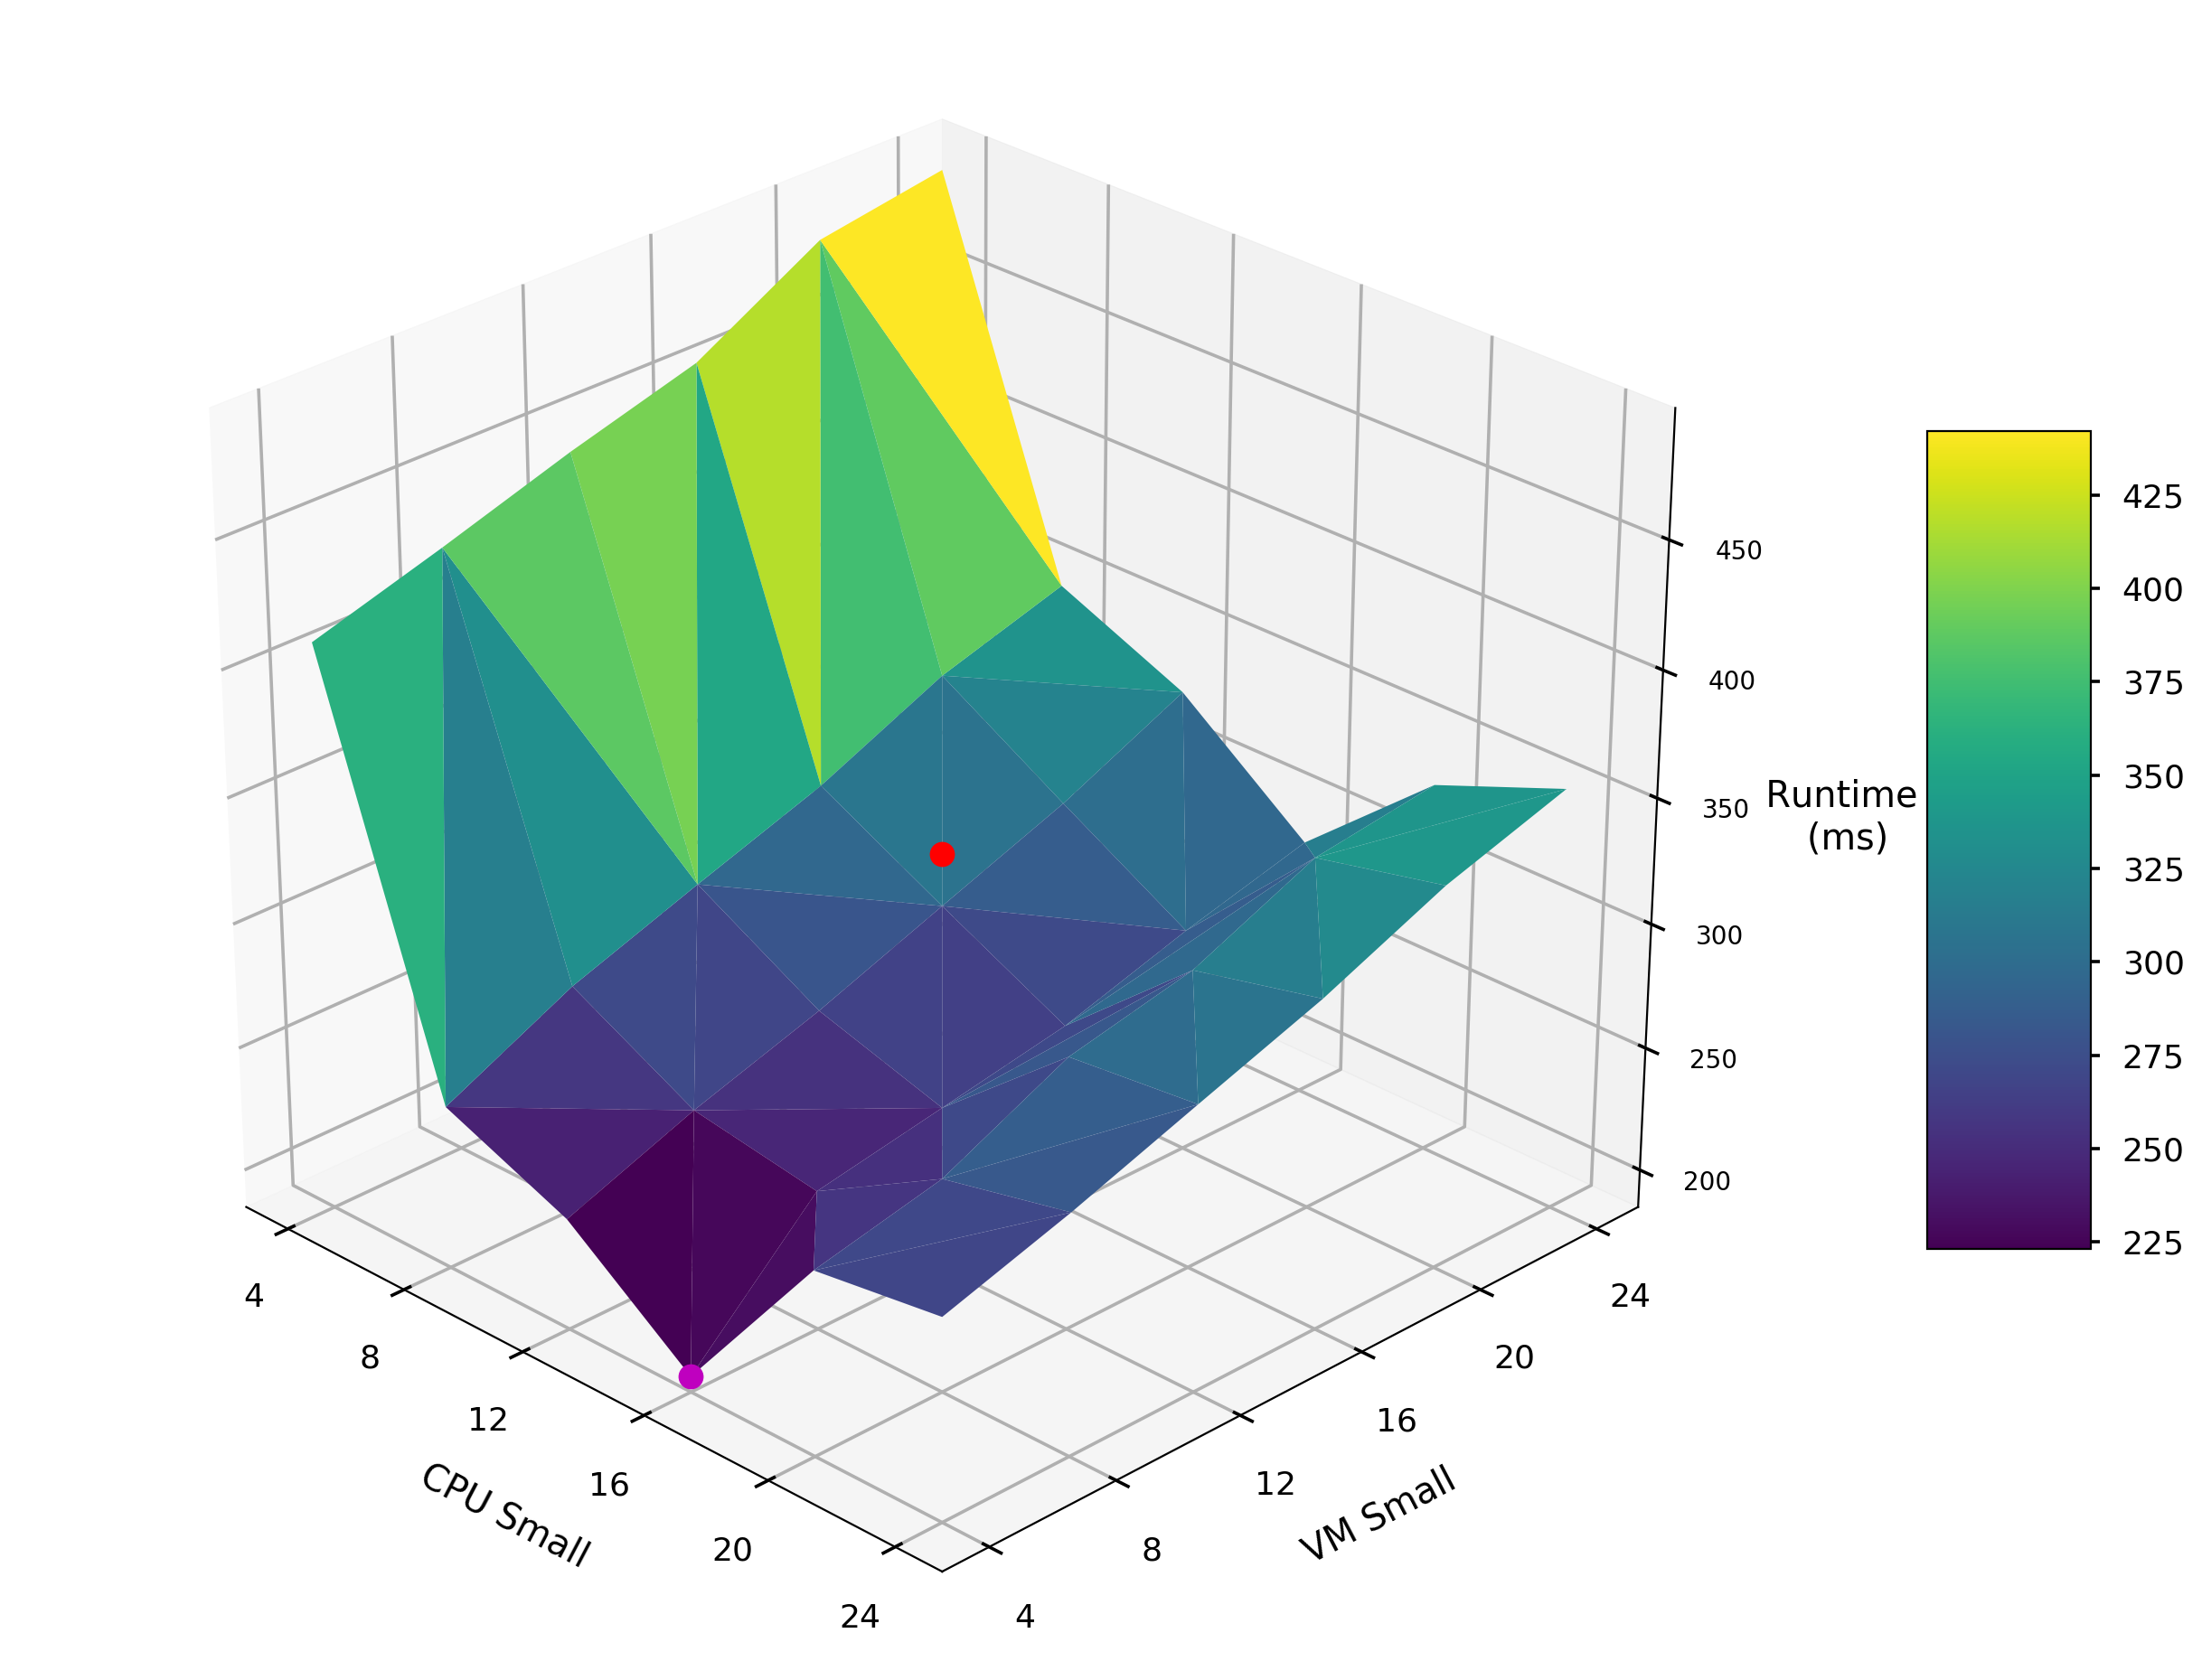

In [9]:
sns.set_context("talk")

# Plot figure
fig = plt.figure(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(reduced_dataset["Num Workers 1"], reduced_dataset["Num Workers 2"], reduced_dataset["Total Runtime"], cmap=plt.cm.viridis, linewidth=0.01)
 
# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)
 
# Rotate
if (exp_no == 4):
    ax.view_init(30, 135)
else:
    ax.view_init(30, 315)

# Plot minimum point
ax.plot([nw1], [nw2], [min_runtime], markerfacecolor='m', markeredgecolor='m', marker='o', markersize=10, alpha=1)

# text = "  Minimum runtime\n     " + str(nw1) + ', ' + str(nw2) + ', ' + str(min_runtime)
# ax.text(nw1, nw2, min_runtime, text, zdir=(0, 0, 0))

# Plot independent point
ax.plot([inw1], [inw2], [imin_value], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10, alpha=1)

ax.set_xlabel('\n' + kernel1.upper() + ' ' + size1.title(), linespacing=4)
ax.set_ylabel('\n' + kernel2.upper() + ' ' + size2.title(), linespacing=4)
ax.set_xticks(range(4, 25, 4))
ax.set_yticks(range(4, 25, 4))
# ax.yaxis._axinfo['label']['space_factor'] = 3.0
# set z ticks and labels
# ax.set_zticks([-2, 0, 2])
# change fontsize
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)
    
# disable auto rotation
ax.zaxis.set_rotate_label(False) 

# ax.set_zlabel('               Runtime\n                (ms)', rotation = 0)
# ax.set_zlabel('               Runtime\n                (ms)', rotation = 0)
# ax.set_zlabel('               Runtime\n                (ms)', rotation = 0)
# ax.set_zlabel('Runtime             \n(ms)', rotation = 0)
ax.set_zlabel('               Runtime\n                (ms)', rotation = 0)

plt.savefig(graph_path)

In [10]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return int(round(m-h)), int(round(m)), int(round(m+h))

In [11]:
# idata1 = raw_dataset1[(raw_dataset1["Num Cores"] == nc1) & (raw_dataset1["Num Workers"] == int(nw1))]
# idata2 = raw_dataset2[(raw_dataset2["Num Cores"] == nc2) & (raw_dataset2["Num Workers"] == nw2)]

data = raw_dataset[(raw_dataset["Num Cores 1"] == nc1) & (raw_dataset["Num Cores 2"] == nc2) & (raw_dataset["Num Workers 1"] == nw1) & (raw_dataset["Num Workers 2"] == nw2)]

data2 = raw_dataset[(raw_dataset["Num Cores 1"] == inc1) & (raw_dataset["Num Cores 2"] == inc2) & (raw_dataset["Num Workers 1"] == inw1) & (raw_dataset["Num Workers 2"] == inw2)]

print("Independently profiled runtime: " + str(int(round(imin_value))))

print("95% Confidence Interval: " + str(mean_confidence_interval(data2["Total Runtime"].values)))

print("Optimal runtime: " + str(int(round(min_runtime))))

print("95% Confidence Interval: " + str(mean_confidence_interval(data["Total Runtime"].values)))

print("Speedup: " + str(imin_value / min_runtime ))

print("NC1: ", nc1, " NC2: ", nc2)

Independently profiled runtime: 305
95% Confidence Interval: (301, 305, 309)
Optimal runtime: 191
95% Confidence Interval: (189, 190, 191)
Speedup: 1.59762546661
NC1:  24  NC2:  4


In [12]:
# call("rm " + graph_folder + "*.png", shell=True)

# for angle in range(45, 225, 2):
 
#     # Make the plot
#     fig = plt.figure()
#     ax = fig.gca(projection='3d')
#     ax.plot_trisurf(reduced_dataset["Num Workers 1"], reduced_dataset["Num Workers 2"], reduced_dataset["Total Runtime"], cmap=plt.cm.viridis, linewidth=0.01)
    
#     # Set the angle of the camera
#     ax.view_init(30, angle)
    
#     # Plot minimum point
#     ax.plot([nw1], [nw2], [min_runtime], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)
    
#     # Plot independent point
# #     ax.plot([inw1], [inw2], [imin_value], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=5, alpha=0.6)
    
#     # Save it
#     filename = graph_folder + str(angle) + '.png'
#     plt.savefig(filename, dpi=128)
#     plt.gca()

# call("convert -delay 15 " + graph_folder + "*.png " + graph_aminated, shell=True)